In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector

# returns controlled Z gate with n input bit and an applied phase of a
global_a = 1
def controlledZGate(n, a):
    global_a = a
    qc = QuantumCircuit(n + 1)
    nGateHelper(n, n, global_a * np.pi, qc)
    return qc

def nGateHelper(numInputBits, outputBit, phase, qc):
#     base case
    if numInputBits == 1:
        qc.cu1(phase, 0, outputBit)
        return
    if numInputBits == 2:
        qc.cu1(phase/2, 1, outputBit)
        qc.cx(0, 1)
        qc.cu1(-phase/2, 1, outputBit)
        qc.cx(0, 1)
        qc.cu1(phase/2, 0, outputBit)
        return
    
    qc.cu1(phase/2, numInputBits - 1, outputBit)
    
    qc.h(numInputBits - 1)
    nGateHelper(numInputBits - 1, numInputBits - 1, global_a * np.pi, qc)
    qc.h(numInputBits - 1)
    
    qc.cu1(-phase/2, numInputBits - 1, outputBit)
    
    qc.h(numInputBits - 1)
    nGateHelper(numInputBits - 1, numInputBits - 1, global_a * np.pi, qc)
    qc.h(numInputBits - 1)
    
    nGateHelper(numInputBits - 1, outputBit, phase/2, qc)
    
# returns toffoli gate with n input bits, n + 1 total bits
def toffoliGate(n):
    qc = QuantumCircuit(n + 1)
    qc.h(n)
    qc += controlledZGate(n, 1)
    qc.h(n)
    return qc
    

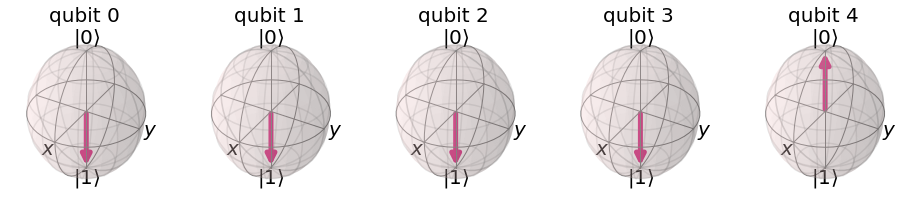

In [3]:
qcs = toffoliGate(4)
vec = Statevector.from_label('11111')
vec = vec.evolve(qcs)
# print(vec.data)
plot_bloch_multivector(vec.data)
# qcs.draw("mpl")